## Demonstration of the MoonlightMap class
Implementation of equation (15) of Krisciunas et al., doi:10.1086/132921

In [1]:
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.time import Time
import astropy.units as u
import numpy as np

import matplotlib.pyplot as plt

from ctapointing.exposure import MoonlightMap

### Create moonlight map
This is done a specific FoV around a given observation position. The result is a tuple of 3 maps which return the (az,alt) coordinates of each map point and the expected moon brightness (in units of m$^{-2}$ s$^{-1}$ sr$^{-1}$).

In [2]:
loc = EarthLocation.of_site('Roque de los Muchachos')
time = Time('2019-10-13 23:08:00') # full moon night
# time = Time('2019-10-28 03:38:00') # new moon night

altaz = AltAz(location=loc, obstime=time)
alt_m, az_m = np.mgrid[-90:90:2, -180:180:2]

coords = SkyCoord(alt=alt_m*u.deg, az=az_m*u.deg, frame=altaz)

In [3]:
m = MoonlightMap()
fluxes, sun_pos, moon_pos, alpha = m.process(coords)

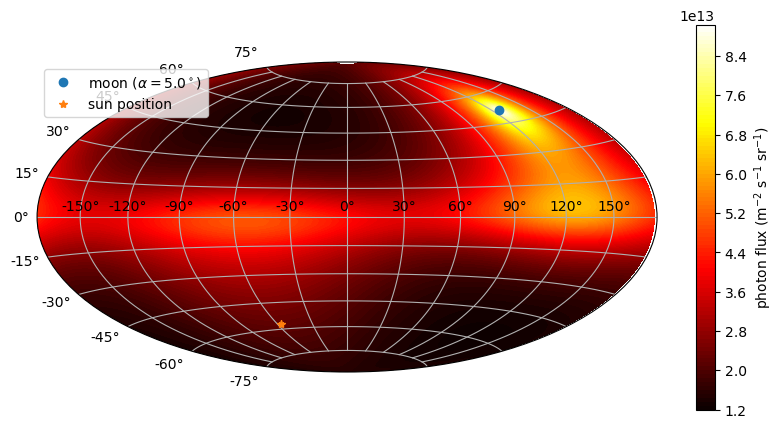

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='hammer')

flux = fluxes.value.reshape(alt_m.shape)
az = coords.az.wrap_at(180*u.deg).radian.reshape(alt_m.shape)
alt = coords.alt.radian.reshape(alt_m.shape)

c = ax.contourf(az, alt, flux, levels=100, cmap=plt.cm.hot)

ax.plot(moon_pos.az.wrap_at(180*u.deg).rad, moon_pos.alt.rad, 'o',
        label=r'moon ($\alpha={:.1f}^\circ$)'.format(alpha.to('deg').value))

ax.plot(sun_pos.az.wrap_at(180*u.deg).rad, sun_pos.alt.rad, '*',
        label=r'sun position')

ax.legend()
ax.grid()

plt.colorbar(c, label=r'photon flux (m$^{-2}$ s$^{-1}$ sr$^{-1}$)')

plt.show()